BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Rent of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [3]:
def show_df(df):   #function to show information about data
    
    print('shape'.center(30,'_'))
    display(df.shape)
    
    print('head'.center(30,'_'))
    display(df.head())
    
    print('tail'.center(30,'_'))
    display(df.tail())
    
    print('info'.center(30,'_')+'\n')
    display(df.info())
    
    print('describe'.center(30,'_'))
    display(df.describe().T)
  
show_df(df)

____________shape_____________


(4746, 12)

_____________head_____________


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


_____________tail_____________


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


_____________info_____________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


None

___________describe___________


,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


In [4]:
def check(df):
    
    #function to check data have null and  duplicated values or no
    
    print('Number of null values'.center(30,'_'))
    print(df.isnull().sum())
    print(50*'_')
    print('\n'+'Number of duplicated values'.center(30,'_')+'\n')
    print(f'--------{df.duplicated().sum()}')
check(df)

____Number of null values_____
Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64
__________________________________________________

_Number of duplicated values__

--------0


## data doesn't have null values or duplicated values 
## have proplem with column posted on and Floor
## a Area Locality doesn't need it
## most of columns are catorigal

In [5]:
df[ 'City' ].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

In [6]:
df[ 'Area Locality' ].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

In [7]:
df['Posted On'].dtypes

dtype('O')

In [8]:
df['Furnishing Status'].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

In [9]:
df['Area Type'].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

In [10]:

df['Floor'].value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

# city and Area Locality both contain address so dropping one

In [11]:
df = df.drop(['Area Locality','Tenant Preferred'],axis = 1)
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,1,Contact Owner


In [12]:
df.rename(columns={'Area Type':'Area_Type','Posted On':'Posted_On','Point of Contact':'Point_of_Contact','Furnishing Status':'Furnishing_Status'},inplace=True)
df.sample()

,Posted_On,BHK,Rent,Size,Floor,Area_Type,City,Furnishing_Status,Bathroom,Point_of_Contact
4051,2022-07-06,2,10000,600,7 out of 7,Super Area,Hyderabad,Unfurnished,2,Contact Owner


In [13]:
df['Posted_On'].dtypes

dtype('O')

In [14]:
df['Posted_On']=pd.to_datetime(df['Posted_On'])
df['Posted_On'].dtypes

dtype('<M8[ns]')

In [15]:
df['Month_Name']=df.Posted_On.dt.month_name()
df.sample()

,Posted_On,BHK,Rent,Size,Floor,Area_Type,City,Furnishing_Status,Bathroom,Point_of_Contact,Month_Name
99,2022-06-13,2,15000,900,1 out of 2,Carpet Area,Kolkata,Semi-Furnished,2,Contact Agent,June


In [16]:
df['Floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

# # column Floor has 2 values first value is floor and second is the total number of house so i divide it to two columns

In [17]:
##Basement Rows have 5 words compared to others which have 4. So reducing this to only 4 characters.

df.loc[df['Floor'].str.split(" ").str[1] == 'Basement', 'Floor_10'] = 'Basement'+" "+ "out"+" "+ "of" +" "+ df['Floor'].str.split(" ").str[4]
df.loc[df['Floor'].str.split(" ").str[1] != 'Basement', 'Floor_10'] = df['Floor'] 

In [18]:
df['Floor']

0       Ground out of 2
1            1 out of 3
2            1 out of 3
3            1 out of 2
4            1 out of 2
             ...       
4741         3 out of 5
4742         1 out of 4
4743         3 out of 5
4744       23 out of 34
4745         4 out of 5
Name: Floor, Length: 4746, dtype: object

In [19]:
df['Floor'] = df['Floor_10']


In [20]:
df.drop('Floor_10', axis = 1, inplace = True )

In [21]:
df.sample(2)

,Posted_On,BHK,Rent,Size,Floor,Area_Type,City,Furnishing_Status,Bathroom,Point_of_Contact,Month_Name
3146,2022-05-16,3,34500,450,Ground out of 3,Carpet Area,Chennai,Semi-Furnished,3,Contact Owner,May
3408,2022-06-07,2,19000,1250,1 out of 2,Super Area,Chennai,Semi-Furnished,2,Contact Owner,June


In [22]:
df['Floor_f'] =  df['Floor'].str.split(' ').str[0]
df['Tot_floors'] =  df['Floor'].str.split(' ').str[3]


# function to make all column numirical data 

In [23]:
df['Floor_f'] = df.apply(lambda x: 0 if x['Floor_f'] =='Ground' 
                                   else (( -1 if x['Floor_f'] =='Basement' else (x['Floor_f']) )) , axis=1)

# convert columns from object to integer

In [24]:
df = df.dropna()
df['Floor_f'] = df['Floor_f'].astype('int64')
df['Tot_floors'] = df['Tot_floors'].astype('int64')
df['BHK'] = df['BHK'].astype('int64')


In [25]:
df.sample()

,Posted_On,BHK,Rent,Size,Floor,Area_Type,City,Furnishing_Status,Bathroom,Point_of_Contact,Month_Name,Floor_f,Tot_floors
4277,2022-07-05,2,9500,650,3 out of 5,Carpet Area,Hyderabad,Unfurnished,2,Contact Owner,July,3,5


In [26]:
df['Floor_f'].value_counts()

 1     1159
 2      945
 0      926
 3      511
 4      272
 5      164
 6       93
 7       74
 10      67
 8       66
 9       65
 12      47
 11      43
 15      41
-1       34
 14      34
 18      26
 17      22
 16      21
 19      16
 13      15
 20      12
 25      12
 23       9
 24       6
 21       6
 30       5
 34       4
 28       4
 27       3
 26       3
 32       3
 60       3
 65       3
 35       3
 22       3
 48       2
 53       2
 45       2
 36       2
 40       2
 29       1
 50       1
 49       1
 39       1
 46       1
 41       1
 44       1
 33       1
 37       1
 47       1
 43       1
 76       1
Name: Floor_f, dtype: int64

In [27]:
cols_num = [i for i in df.columns if df[i].dtype != '<M8[ns]']
col_num = [i for i in cols_num if df[i].dtype != 'O']
col_num


['BHK', 'Rent', 'Size', 'Bathroom', 'Floor_f', 'Tot_floors']

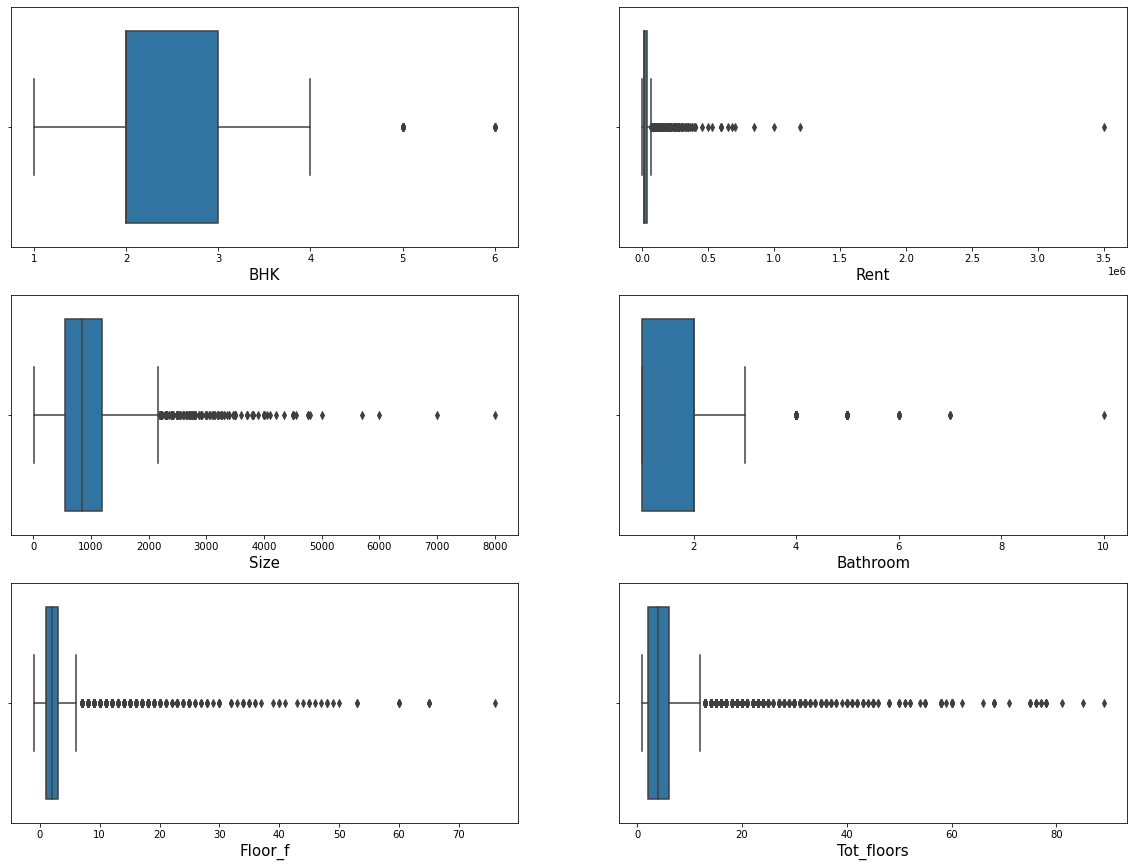

In [28]:
plt.figure(figsize=(20,15))
for i,col in enumerate(col_num):
        plt.subplot(3,2,i+1)
        sns.boxplot(data=df ,x=col)
        plt.xlabel(col, fontsize=15)
        plt.xticks(fontsize=10)

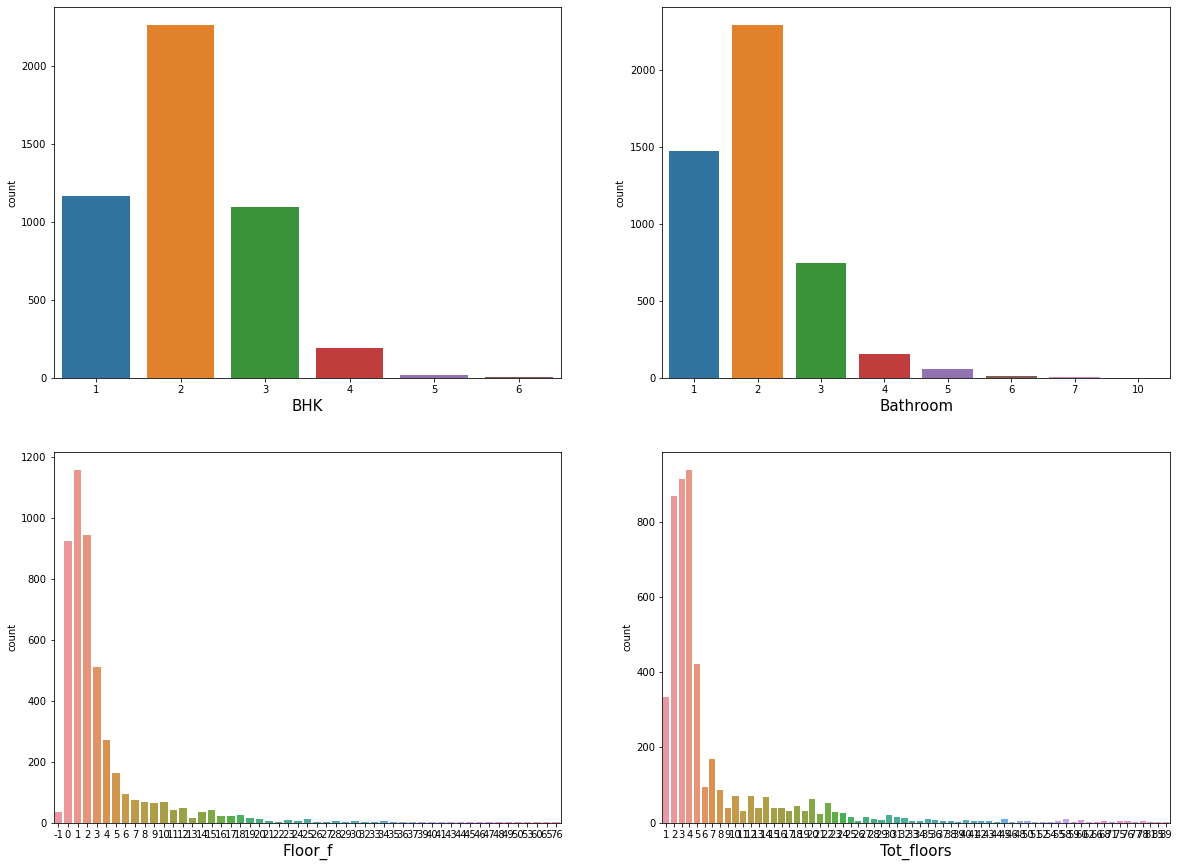

In [29]:
cols_count = ['BHK','Bathroom','Floor_f','Tot_floors']
plt.figure(figsize=(20,15))
for i,col in enumerate(cols_count):
        plt.subplot(2,2,i+1)
        sns.countplot(data=df ,x=col)
        plt.xlabel(col, fontsize=15)
        plt.xticks(fontsize=10),

In [30]:
def detect_outliers(df): #to deal with outliers 
    cols = ['BHK','Bathroom'] #the fence high to those two columns are fraction 
    for col in col_num:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        fence_low = q1 - (1.5*iqr)
        fence_high = q3 + (1.5*iqr)
        if col in cols:
            df.loc[(df[col] > fence_high),col] = 4
        else:
            df.loc[(df[col] < fence_low),col] = fence_low
            df.loc[(df[col] > fence_high),col] = fence_high
detect_outliers(df)

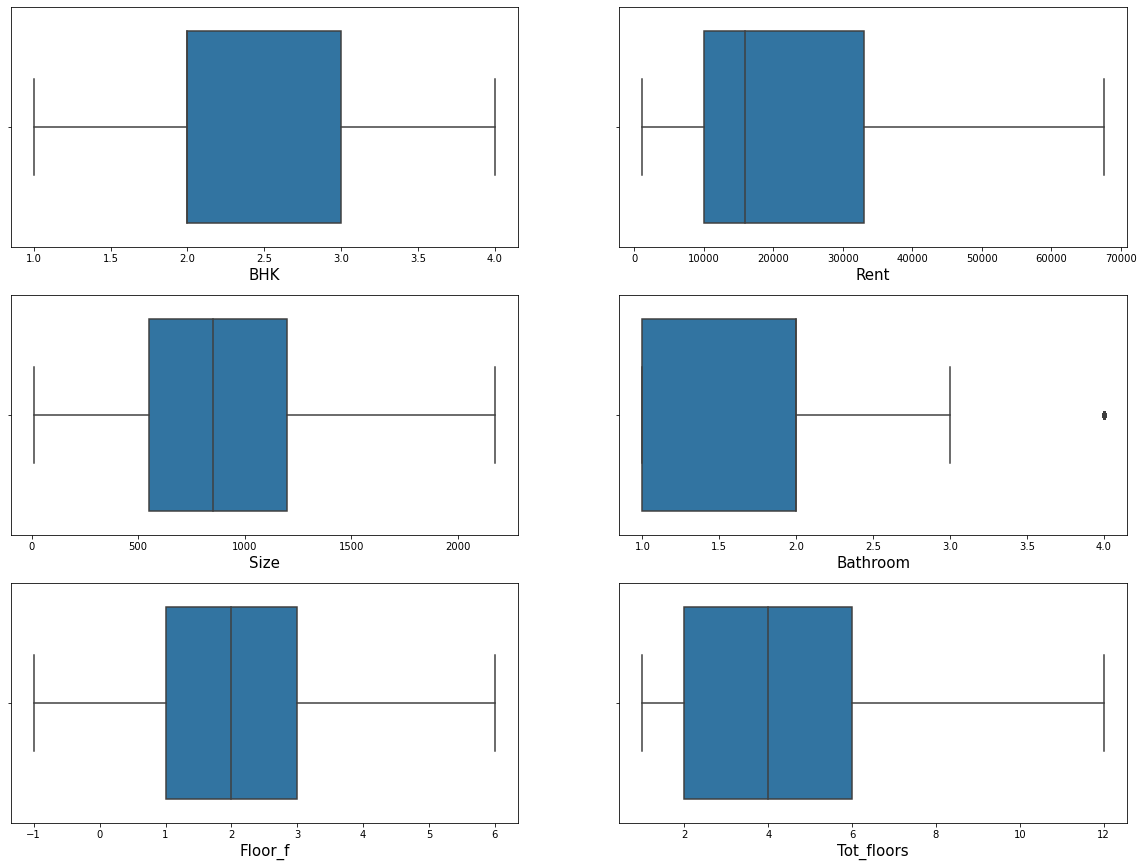

In [31]:
plt.figure(figsize=(20,15))
for i,col in enumerate(col_num):
        plt.subplot(3,2,i+1)
        sns.boxplot(data=df ,x=col)
        plt.xlabel(col, fontsize=15)
        plt.xticks(fontsize=10)

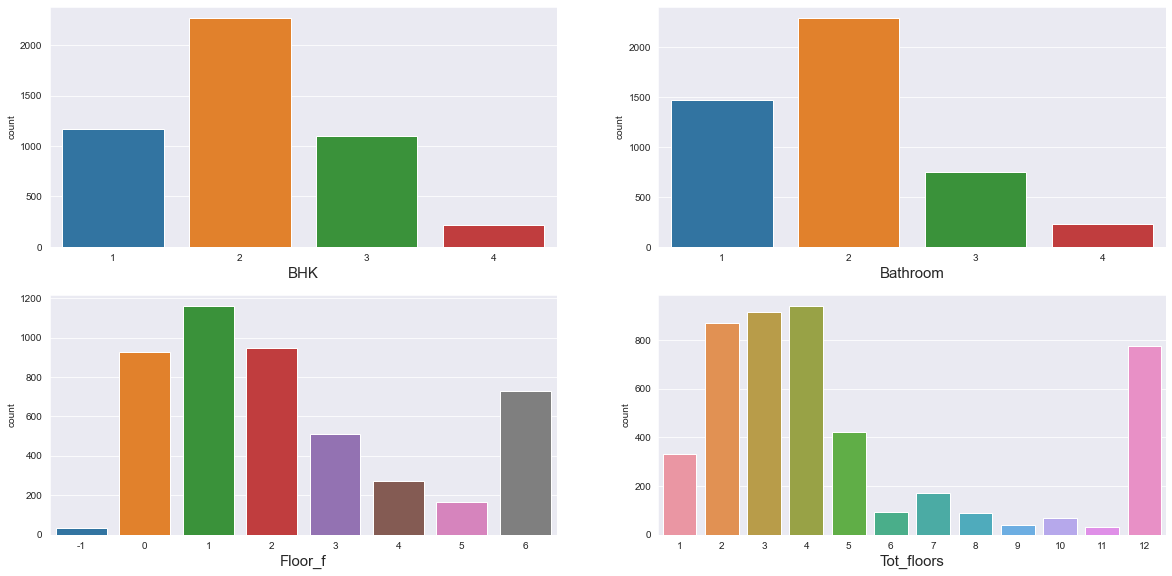

In [64]:
plt.figure(figsize=(20,15))
for i,col in enumerate(cols_count):
        plt.subplot(3,2,i+1)
        sns.countplot(data=df ,x=col)
        plt.xlabel(col, fontsize=15)
        plt.xticks(fontsize=10)

<AxesSubplot:>

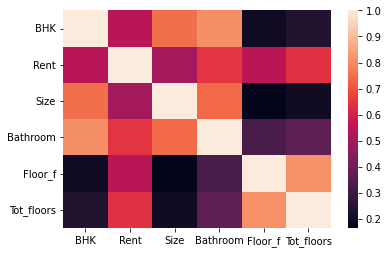

In [34]:
sns.heatmap(df.corr())

the rent depends on size ,Tot_floor and Bhk

In [35]:
df.sample()

,Posted_On,BHK,Rent,Size,Floor,Area_Type,City,Furnishing_Status,Bathroom,Point_of_Contact,Month_Name,Floor_f,Tot_floors
2808,2022-05-18,2,12000,650,2 out of 4,Carpet Area,Delhi,Unfurnished,1,Contact Agent,May,2,4


<AxesSubplot:xlabel='Furnishing_Status', ylabel='Rent'>

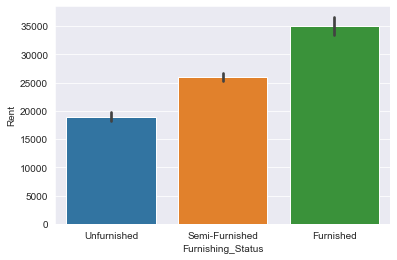

In [44]:
sns.set_style('darkgrid')
sns.barplot(x='Furnishing_Status',y='Rent',data=df)

<AxesSubplot:xlabel='Area_Type', ylabel='Rent'>

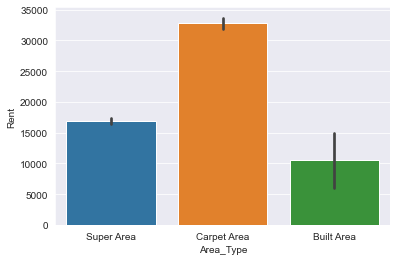

In [50]:
sns.barplot(x='Area_Type',y='Rent',data=df)

<AxesSubplot:xlabel='Point_of_Contact', ylabel='Rent'>

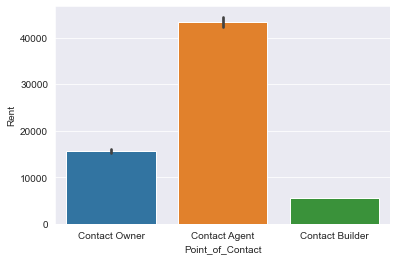

In [51]:
sns.barplot(x='Point_of_Contact',y='Rent',data=df)

<AxesSubplot:xlabel='Month_Name', ylabel='Rent'>

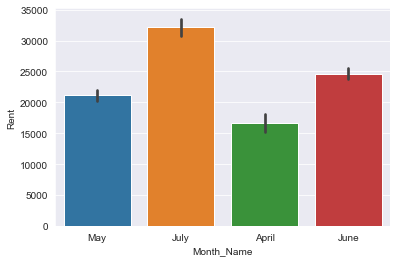

In [52]:
sns.barplot(x='Month_Name',y='Rent',data=df)

<AxesSubplot:xlabel='Floor_f', ylabel='Rent'>

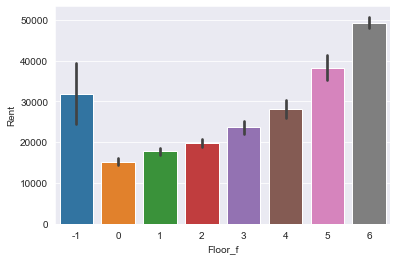

In [60]:
sns.barplot(x='Floor_f',y='Rent',data=df)

<AxesSubplot:xlabel='Bathroom', ylabel='Rent'>

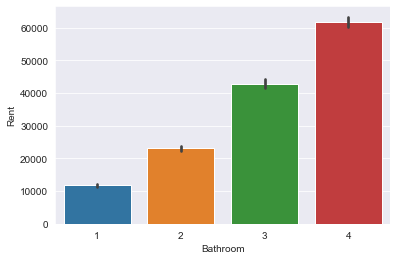

In [53]:
sns.barplot(x='Bathroom',y='Rent',data=df)

<AxesSubplot:xlabel='BHK', ylabel='Rent'>

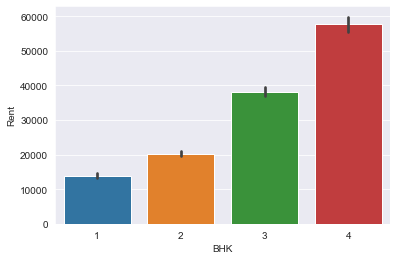

In [59]:
sns.barplot(x='BHK',y='Rent',data=df)

<AxesSubplot:xlabel='City', ylabel='Rent'>

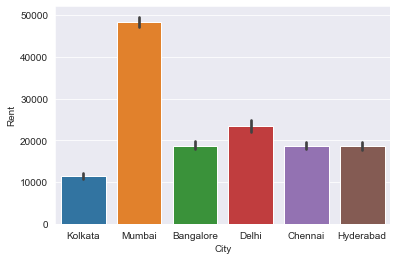

In [57]:
sns.barplot(x='City',y='Rent',data=df)

<AxesSubplot:xlabel='Month_Name', ylabel='Rent'>

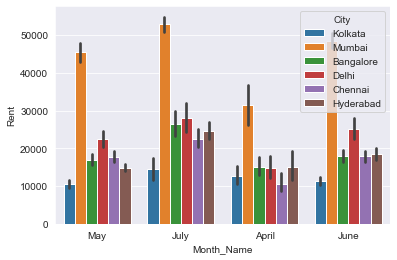

In [58]:
sns.barplot(x='Month_Name',y='Rent',hue='City',data=df)

<AxesSubplot:xlabel='Area_Type', ylabel='Rent'>

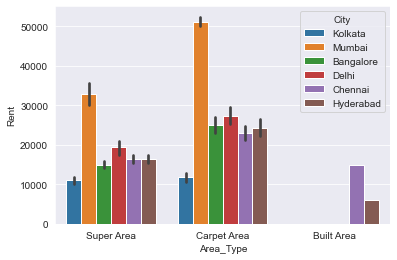

In [56]:
sns.barplot(x='Area_Type',y='Rent',hue='City',data=df)

<AxesSubplot:xlabel='BHK', ylabel='Rent'>

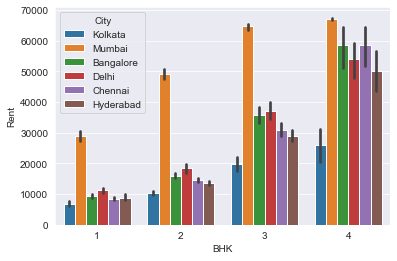

In [65]:
sns.barplot(data=df,x='BHK',y='Rent',hue='City')

<AxesSubplot:xlabel='Size', ylabel='Rent'>

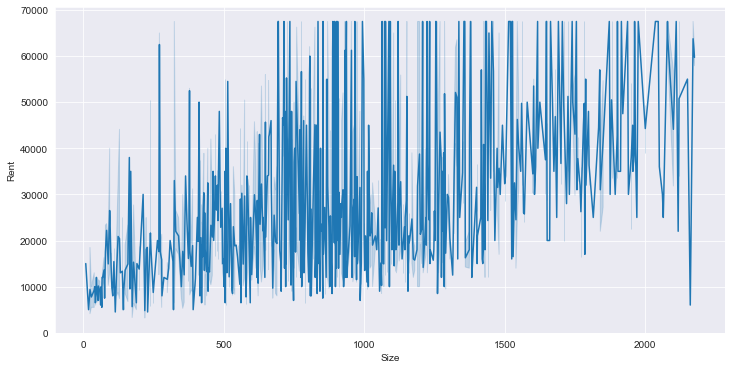

In [66]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Size',y='Rent',data=df)

<AxesSubplot:xlabel='Size', ylabel='Rent'>

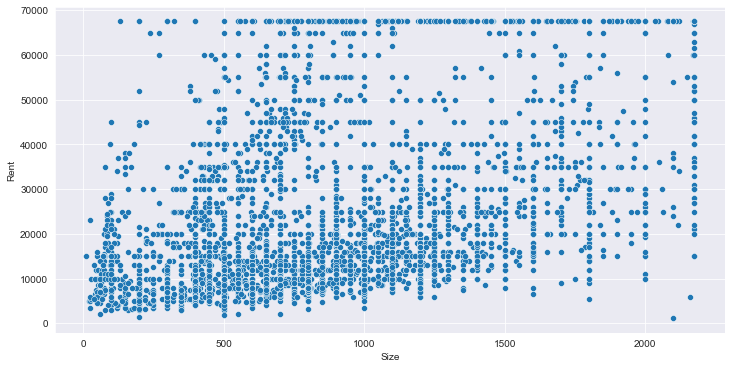

In [67]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Size',y='Rent',data=df)